In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
data=pd.read_csv('Day4_medico.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
data=data.fillna(method='bfill')

C:\Users\vamsi\AppData\Local\Temp\ipykernel_8648\4149266643.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


In [20]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [22]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

<Axes: ylabel='count'>

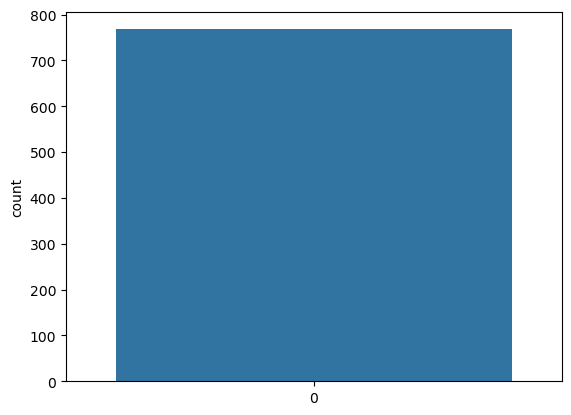

In [23]:
sns.countplot(data['Outcome'])

In [24]:
from sklearn.model_selection import train_test_split as tts 
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.25,random_state=2)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)



*****Training Data Shape" *******


Training data-X- Shape:	 (576, 8)

Training data-y- Shape:	 (576, 1)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (192, 8)

Testing data (y-Outcome) Shape:	 (192, 1)


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(xtrain,ytrain)
print('\nHyperparameter:\n\n',dt_clf.get_params())
ypred=dt_clf.predict(xtest)
print("\nPredicted class lables for the test samples:\n\n",ypred)


Hyperparameter:

 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Predicted class lables for the test samples:

 [0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 0]


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('\n*****Decision Tree Performance Measure*******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))



*****Decision Tree Performance Measure*******


****************************** 
****************************** 

Accuracy Score :	 0.6666666666666666

****************************** 
****************************** 

Confusion Matrix:
 [[98 36]
 [28 30]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           0       0.78      0.73      0.75       134
           1       0.45      0.52      0.48        58

    accuracy                           0.67       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.68      0.67      0.67       192



In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(xtrain,ytrain)
ypred=dt_clf.predict(xtest)
print('\n*****Decision Tree Performance Measure *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))



*****Decision Tree Performance Measure *******


****************************** 
****************************** 

Accuracy Score :	 0.6875

****************************** 
****************************** 

Confusion Matrix:	 [[104  30]
 [ 30  28]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           0       0.78      0.78      0.78       134
           1       0.48      0.48      0.48        58

    accuracy                           0.69       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.69      0.69      0.69       192



C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[None,3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

4


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [33]:
grid_search.best_params_

{'max_depth': 4}

In [34]:
grid_search.cv_results_

{'mean_fit_time': array([0.00345554, 0.00242395, 0.00233455, 0.00234179, 0.00271802,
        0.00255513, 0.00300083, 0.00291834]),
 'std_fit_time': array([0.00071609, 0.0003835 , 0.00055833, 0.00037189, 0.00041133,
        0.00073389, 0.0003173 , 0.00021046]),
 'mean_score_time': array([0.00111618, 0.00097966, 0.00076804, 0.00110369, 0.00100126,
        0.00111375, 0.00120783, 0.00099788]),
 'std_score_time': array([2.31790567e-04, 4.37738070e-05, 3.88938319e-04, 6.83424824e-04,
        1.77521805e-06, 2.57736002e-04, 3.96568955e-04, 7.53885428e-06]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.62931034, 0.70689655, 0.70689655, 0.646

In [35]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
grid_search.best_index_

2

In [37]:
grid_search.classes_

array([0, 1], dtype=int64)

In [38]:
grid_search.cv

5

In [39]:
grid_search.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [40]:
grid_search.n_splits_

5

In [41]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.47495335820895523, 0.9736842105263158, 'X[1] <= 127.5\nentropy = 0.946\nsamples = 576\nvalue = [366, 210]'),
 Text(0.1208955223880597, 0.9210526315789473, 'X[5] <= 26.45\nentropy = 0.708\nsamples = 352\nvalue = [284, 68]'),
 Text(0.03582089552238806, 0.868421052631579, 'X[5] <= 9.1\nentropy = 0.139\nsamples = 102\nvalue = [100, 2]'),
 Text(0.023880597014925373, 0.8157894736842105, 'X[7] <= 28.0\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.011940298507462687, 0.7631578947368421, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03582089552238806, 0.7631578947368421, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04776119402985075, 0.8157894736842105, 'entropy = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.20597014925373133, 0.868421052631579, 'X[7] <= 28.5\nentropy = 0.833\nsamples = 250\nvalue = [184, 66]'),
 Text(0.07164179104477612, 0.8157894736842105, 'X[5] <= 45.4\nentropy = 0.552\nsamples = 125\nvalue = [109, 16]'),
 Text(0.05970149253731343, 0.76

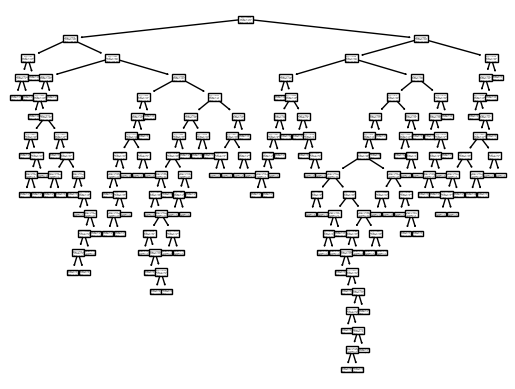

In [42]:
from sklearn import tree
tree.plot_tree(dt_clf)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt_clf.fit(xtrain,ytrain)
ypred=dt_clf.predict(xtest)
print('\nHyperparameter:\n\n',dt_clf.get_params())
print("\nPredicted class lables for the test samples:\n\n",ypred)

print('\n*****Decision Tree Performance Measure *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))



Hyperparameter:

 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Predicted class lables for the test samples:

 [0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0]

*****Decision Tree Performance Measure *******


****************************** 
****************************** 

Accuracy Score :	 0.7239583333333334

****************************** 
****************************** 

Confusion Matrix:	 [[107  27]
 [ 26  32]]

**

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

[Text(0.5, 0.8333333333333334, 'X[1] <= 127.5\nentropy = 0.946\nsamples = 576\nvalue = [366, 210]'),
 Text(0.25, 0.5, 'X[5] <= 26.45\nentropy = 0.708\nsamples = 352\nvalue = [284, 68]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.139\nsamples = 102\nvalue = [100, 2]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.833\nsamples = 250\nvalue = [184, 66]'),
 Text(0.75, 0.5, 'X[1] <= 165.5\nentropy = 0.948\nsamples = 224\nvalue = [82, 142]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.997\nsamples = 158\nvalue = [74, 84]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.533\nsamples = 66\nvalue = [8, 58]')]

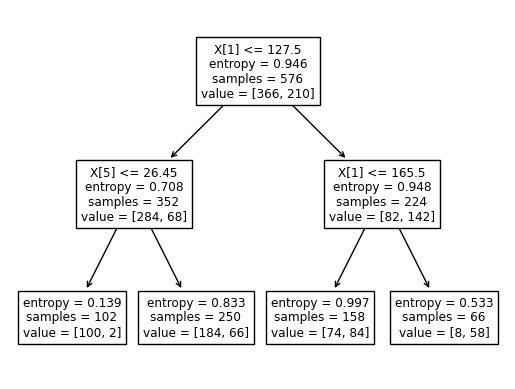

In [44]:
tree.plot_tree(dt_clf)